In [14]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [15]:
models = ["gpt2", "gpt2-medium"]
lengths = [5, 10, 15, 20]
title = {
    5: "1hole_(50, 50)_5_121_0-100",
    10: "1hole_(50, 50)_10_441_0-100",
    15: "1hole_(50, 50)_15_961_0-100",
    20: "1hole_(50, 50)_20_1681_0-100"
}

In [16]:
def get_acc(model_name, length, scratch):
    file_path = f"save_model_{model_name}/addition/{title[length]}/model_99/result_only_test_10.npy" if not scratch else f"save_model_{model_name}/addition/{title[length]}_scratch/model_99/result_only_test_10.npy"
    acc_mat = np.load(file_path)
    return np.mean(acc_mat)

<Figure size 600x200 with 0 Axes>

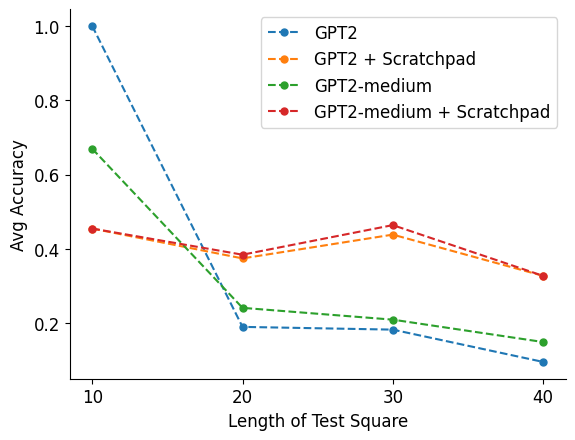

In [18]:
plt.figure(figsize=(6,2))
fig, ax = plt.subplots(1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for model in models:
    for scratch in [0, 1]:
        plt.plot(2 * np.array(lengths), [get_acc(model, length, scratch) for length in lengths], label = f"{re.sub('gpt', 'GPT', model)} + Scratchpad" if scratch else re.sub("gpt", "GPT", model), linestyle="--", marker="o", markersize=5)
plt.ylabel("Avg Accuracy", fontsize=12)
plt.xlabel("Length of Test Square", fontsize=12)
plt.xticks([10, 20, 30, 40])
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.savefig("fig_ablation.pdf", bbox_inches="tight")